In [1]:
import pandas as pd
import numpy as np

In [2]:
dsets = ['income', 'compas', 'german']

for d in dsets:
    df = pd.read_csv(d + '_experiment_mean.csv')
    dp_df = pd.read_csv(d + '_experiment_mean_dp.csv')
    df['e'] = np.nan
    dp_df.rename(columns={'t':'tau'}, inplace=True)
    new_df = pd.concat([df, dp_df]).reset_index(drop=True)
    new_df.drop(['kf', 'lf'], axis=1, inplace=True)
    for p in ['k', 'u', 'f']:
        new_df[p].replace(0, np.nan, inplace=True)
    new_df.rename(columns={'m': 'micro_agg',
                           'e': 'epsilon', 
                           'nc': 'neg_corr'}, inplace=True)
    cols = new_df.columns.tolist()
    cols = cols[9:12] + [cols[0]] + cols[12:] + [cols[1], cols[5]] + cols[2:5] + cols[6:9]
    new_df = new_df[cols]
    new_df.to_csv(d + '_experiment_mean_all.csv', index=False)

In [3]:
dsets = ['income', 'compas', 'german']

perf = ['accuracy', 'auc', 'f1', 'precision', 'recall']
fair = ['dpr', 'eor', 'eOdds']
params = ['k', 'u', 'f', 'tau', 'neg_corr', 'micro_agg', 'epsilon']
m_perf = ['perf_name', 'perf_val']

for d in dsets:
    df = pd.read_csv(d + '_experiment_mean_all.csv')
    melt_df = pd.melt(df, id_vars=fair+params, value_vars=perf,
                      var_name='perf_name', value_name='perf_val')
    melt_df = pd.melt(melt_df, id_vars=params+m_perf, value_vars=fair,
                      var_name='fair_name', value_name='fair_val')
    melt_df.to_csv(d + '_experiment_mean_all_melt.csv', index=False)

In [4]:
new_df.head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,accuracy,auc,f1,precision,recall,dpr,eor,eOdds
0,NaN,3.0,7.0,0.0,0.0,0.0,NaN,0.750,0.672211,0.828407,0.795039,0.865176,0.107438,0.057513,0.231902
1,NaN,3.0,7.0,0.0,0.0,1.0,NaN,0.697,0.536276,0.812166,0.716979,0.937172,0.097853,0.083395,0.215193
2,NaN,3.0,7.0,0.0,1.0,0.0,NaN,0.750,0.672211,0.828407,0.795039,0.865176,0.107438,0.057513,0.231902
3,NaN,3.0,7.0,0.0,1.0,1.0,NaN,0.697,0.536276,0.812166,0.716979,0.937172,0.097853,0.083395,0.215193
4,NaN,6.0,14.0,0.0,0.0,0.0,NaN,0.744,0.668788,0.823352,0.794180,0.855243,0.104053,0.064211,0.217518


In [6]:
melt_df.head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,perf_name,perf_val,fair_name,fair_val
0,NaN,3.0,7.0,0.0,0.0,0.0,NaN,accuracy,0.750,dpr,0.107438
1,NaN,3.0,7.0,0.0,0.0,1.0,NaN,accuracy,0.697,dpr,0.097853
2,NaN,3.0,7.0,0.0,1.0,0.0,NaN,accuracy,0.750,dpr,0.107438
3,NaN,3.0,7.0,0.0,1.0,1.0,NaN,accuracy,0.697,dpr,0.097853
4,NaN,6.0,14.0,0.0,0.0,0.0,NaN,accuracy,0.744,dpr,0.104053


In [7]:
new_df.shape

(4405, 15)

## Plots

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('income_experiment_mean_all.csv')
melt_df = pd.read_csv('income_experiment_mean_all_melt.csv')
df.head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,accuracy,auc,f1,precision,recall,dpr,eor,eOdds
0,NaN,3.0,7.0,0.0,0.0,0.0,NaN,0.850711,0.764001,0.658103,0.733602,0.596729,0.185789,0.132036,0.210494
1,NaN,3.0,7.0,0.0,0.0,1.0,NaN,0.837628,0.750986,0.633984,0.693957,0.583851,0.272914,0.491262,0.621660
2,NaN,3.0,7.0,0.0,1.0,0.0,NaN,0.850711,0.764001,0.658103,0.733602,0.596729,0.185789,0.132036,0.210494
3,NaN,3.0,7.0,0.0,1.0,1.0,NaN,0.837628,0.750986,0.633984,0.693957,0.583851,0.272914,0.491262,0.621660
4,NaN,7.0,13.0,0.0,0.0,0.0,NaN,0.850588,0.761306,0.655024,0.737638,0.589074,0.173952,0.096202,0.167552


In [58]:
df['cluster_size'] = np.nan_to_num(df.k) + np.nan_to_num(df.u) + np.nan_to_num(df.f)
df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else 'base' for e, u in zip(df.k, df.u)]

melt_df['cluster_size'] = np.nan_to_num(melt_df.k) + np.nan_to_num(melt_df.u) + np.nan_to_num(melt_df.f)
melt_df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else 'base' for e, u in zip(melt_df.k, melt_df.u)]

In [67]:
melt_df.loc[melt_df.cluster_type == 'base', 'tau'] = 0
melt_df.loc[melt_df.cluster_type == 'base', 'micro_agg'] = 1

In [70]:
melt_df[melt_df.epsilon.isnull()
        & (melt_df.tau == 0)
        & (melt_df.micro_agg == 1)]

,k,u,f,tau,neg_corr,micro_agg,epsilon,perf_name,perf_val,fair_name,fair_val,cluster_size,cluster_type
1,NaN,3.0,7.0,0.0,0.0,1.0,NaN,accuracy,0.837628,dpr,0.272914,10.0,uf
3,NaN,3.0,7.0,0.0,1.0,1.0,NaN,accuracy,0.837628,dpr,0.272914,10.0,uf
5,NaN,7.0,13.0,0.0,0.0,1.0,NaN,accuracy,0.813058,dpr,0.300168,20.0,uf
7,NaN,7.0,13.0,0.0,1.0,1.0,NaN,accuracy,0.813058,dpr,0.300168,20.0,uf
9,NaN,10.0,20.0,0.0,0.0,1.0,NaN,accuracy,0.799084,dpr,0.285070,30.0,uf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61743,90.0,NaN,NaN,0.0,0.0,1.0,NaN,recall,0.583703,eOdds,0.413125,90.0,k
61745,90.0,NaN,NaN,0.0,1.0,1.0,NaN,recall,0.583703,eOdds,0.413125,90.0,k
61747,100.0,NaN,NaN,0.0,0.0,1.0,NaN,recall,0.583941,eOdds,0.381758,100.0,k
61749,100.0,NaN,NaN,0.0,1.0,1.0,NaN,recall,0.583941,eOdds,0.381758,100.0,k


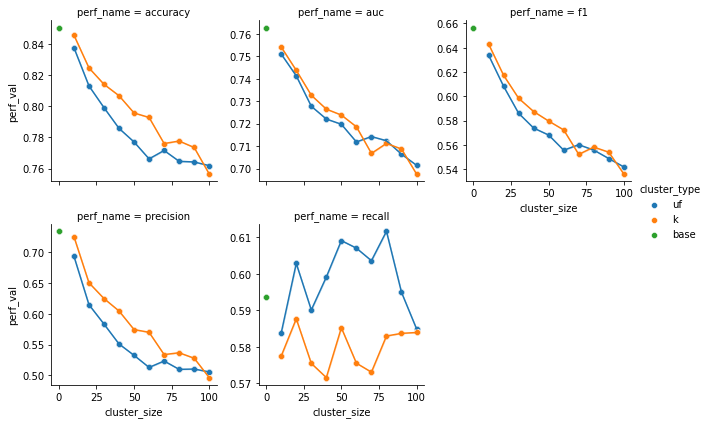

In [77]:
g = sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='perf_name', col_wrap=3)
g.map(sns.scatterplot, "cluster_size", "perf_val")
g.map(sns.lineplot, "cluster_size", "perf_val")
g.add_legend()

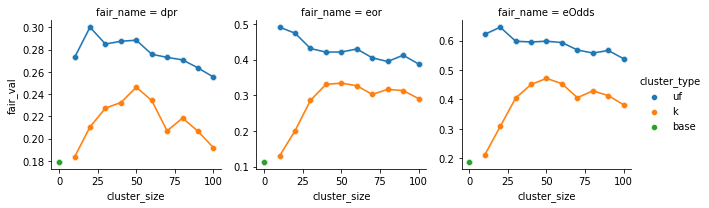

In [82]:
g = (sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='fair_name', col_wrap=3)
     .map(sns.scatterplot, "cluster_size", "fair_val")
     .map(sns.lineplot, "cluster_size", "fair_val")
     .add_legend()
    )

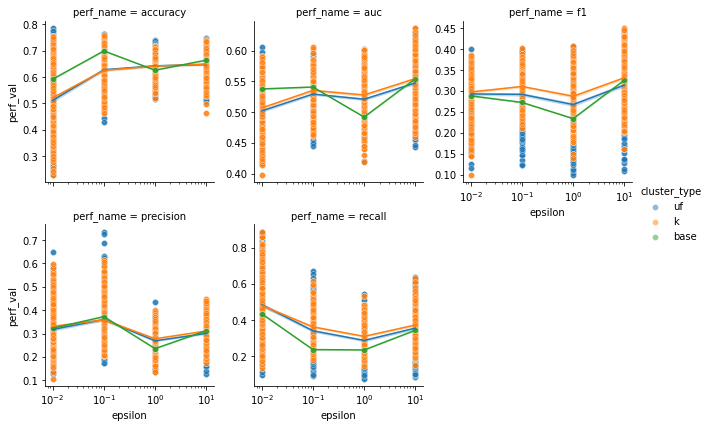

In [99]:
g = (sns.FacetGrid(data=melt_df,#[melt_df.cluster_type == 'base'],
            sharey=False, col='perf_name', col_wrap=3, hue='cluster_type')
     .map(sns.scatterplot, "epsilon", "perf_val", alpha=0.5)
     .map(sns.lineplot, "epsilon", "perf_val")
     .set(xscale = 'log')
     .add_legend()
    )

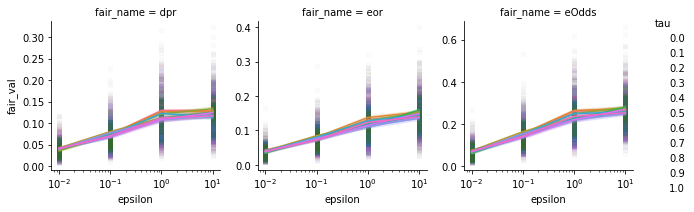

In [101]:
g = (sns.FacetGrid(data=melt_df,#[melt_df.cluster_type == 'base'],
            sharey=False, col='fair_name', col_wrap=3, hue='tau')
     .map(sns.scatterplot, "epsilon", "fair_val", alpha=0.005)
     .map(sns.lineplot, "epsilon", "fair_val")
     .set(xscale = 'log')
     .add_legend()
    )

In [102]:
(.1 + .01) / 2


0.055

In [145]:
x1 = list(np.logspace(-3, 1, num=9).round(3))
x1 + [None]

[0.001, 0.003, 0.01, 0.032, 0.1, 0.316, 1.0, 3.162, 10.0, None]

In [142]:
df1 = pd.DataFrame({'x': x1, 'y': [1]*9})
df1

,x,y
0,0.001,1
1,0.003,1
2,0.010,1
3,0.032,1
4,0.100,1
5,0.316,1
6,1.000,1
7,3.162,1
8,10.000,1


<AxesSubplot:xlabel='x', ylabel='y'>

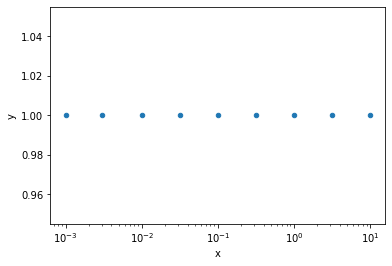

In [143]:
df1.plot.scatter(x='x', y='y', logx=True)

In [146]:
df1

,x,y
0,0.001,1
1,0.003,1
2,0.010,1
3,0.032,1
4,0.100,1
5,0.316,1
6,1.000,1
7,3.162,1
8,10.000,1


In [152]:
df2 = pd.DataFrame({'x': [np.nan], 'y': [1]})
df2

df1 = df1.append(df2)
df1

,x,y
0,0.001,1
1,0.003,1
2,0.010,1
3,0.032,1
4,0.100,1
5,0.316,1
6,1.000,1
7,3.162,1
8,10.000,1
0,NaN,1


In [153]:
df1['z'] = np.nan
df1

,x,y,z
0,0.001,1,NaN
1,0.003,1,NaN
2,0.010,1,NaN
3,0.032,1,NaN
4,0.100,1,NaN
5,0.316,1,NaN
6,1.000,1,NaN
7,3.162,1,NaN
8,10.000,1,NaN
0,NaN,1,NaN


In [149]:
b = None

a = 2 if b is None else 3
a


2

In [157]:
dp_df = pd.read_csv('income_DP_Experiment_all.csv')
dp_df.drop(['Unnamed: 0'], axis=1, inplace=True)
dp_df.head()

,accuracy,f1,precision,recall,auc,dpr,eor,eOdds,e
0,0.82865,0.566096,0.727273,0.463399,0.704079,0.186974,0.302213,0.382332,NaN
1,0.82865,0.566096,0.727273,0.463399,0.704079,0.186974,0.302213,0.382332,NaN
2,0.82865,0.566096,0.727273,0.463399,0.704079,0.186974,0.302213,0.382332,NaN
3,0.82865,0.566096,0.727273,0.463399,0.704079,0.186974,0.302213,0.382332,NaN
4,0.82865,0.566096,0.727273,0.463399,0.704079,0.186974,0.302213,0.382332,NaN
